In [ ]:
library(rpart)

In [ ]:
# carregando dados
dados <- read.csv('/content/Credit.csv')
head(dados)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,⋯,'real estate',67,none,own,2,skilled,1,yes,yes,good
2,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,⋯,'real estate',22,none,own,1,skilled,1,none,yes,bad
3,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,⋯,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
4,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,⋯,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
5,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,⋯,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
6,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,⋯,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good


In [ ]:
# dimensoes do dataframe
dim(dados)

[1] 1000   21

In [ ]:
# descricao dos dados
summary(dados)

 checking_status       duration    credit_history       purpose         
 Length:1000        Min.   : 4.0   Length:1000        Length:1000       
 Class :character   1st Qu.:12.0   Class :character   Class :character  
 Mode  :character   Median :18.0   Mode  :character   Mode  :character  
                    Mean   :20.9                                        
                    3rd Qu.:24.0                                        
                    Max.   :72.0                                        
 credit_amount   savings_status      employment        installment_commitment
 Min.   :  250   Length:1000        Length:1000        Min.   :1.000         
 1st Qu.: 1366   Class :character   Class :character   1st Qu.:2.000         
 Median : 2320   Mode  :character   Mode  :character   Median :3.000         
 Mean   : 3271                                         Mean   :2.973         
 3rd Qu.: 3972                                         3rd Qu.:4.000         
 Max.   :18424       

In [ ]:
head(dados$class)

[1] "good" "bad"  "good" "good" "bad"  "good"

In [ ]:
# preparando dados para modelo
amostra <- sample(2, 1000, replace=T, prob=c(0.7,0.3))

X_train <- dados[amostra==1,]
X_test <- dados[amostra==2,]

In [ ]:
# modelo
modelo <- rpart(class ~ ., data=X_train, method = 'class')
print(modelo)

n= 701 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 701 221 good (0.3152639 0.6847361)  
   2) checking_status=<0,0<=X<200 377 177 good (0.4694960 0.5305040)  
     4) credit_history='all paid','no credits/all paid' 46  11 bad (0.7608696 0.2391304) *
     5) credit_history='critical/other existing credit','delayed previously','existing paid' 331 142 good (0.4290030 0.5709970)  
      10) duration>=22.5 135  60 bad (0.5555556 0.4444444)  
        20) purpose='domestic appliance','new car',education,radio/tv 71  22 bad (0.6901408 0.3098592)  
          40) checking_status=<0 35   5 bad (0.8571429 0.1428571) *
          41) checking_status=0<=X<200 36  17 bad (0.5277778 0.4722222)  
            82) duration>=27 25   8 bad (0.6800000 0.3200000) *
            83) duration< 27 11   2 good (0.1818182 0.8181818) *
        21) purpose='used car',business,furniture/equipment,other 64  26 good (0.4062500 0.5937500)  
          42) credit_amount>=8097.5 11   2 bad

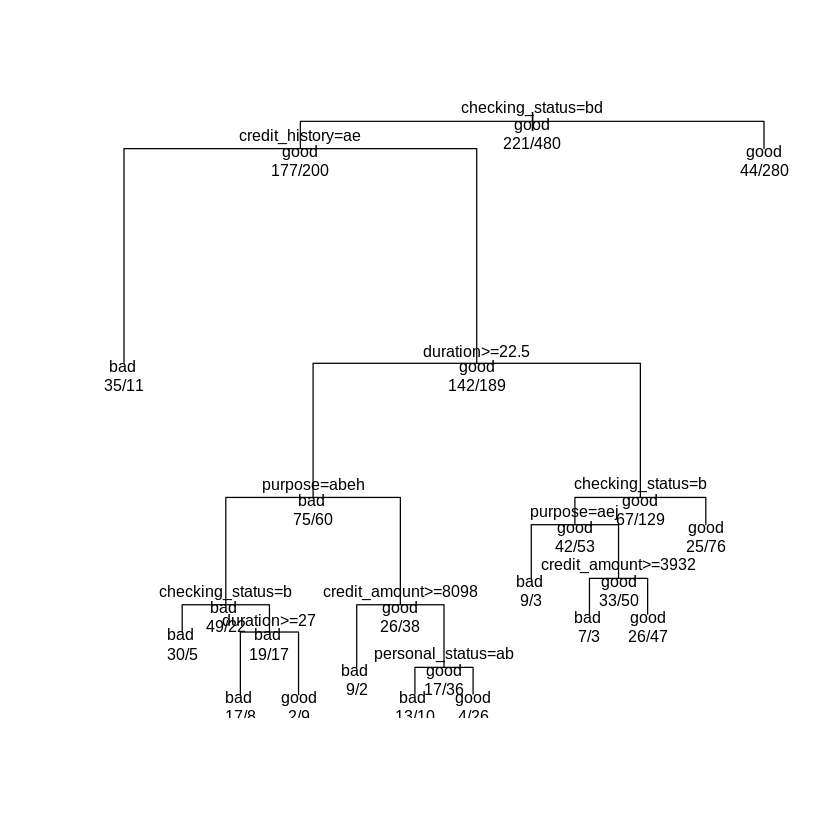

In [ ]:
# visualizando arvore de decisao
plot(modelo)
text(modelo, use.n = T, all = T, cex = .8)

In [ ]:
# previsoes do modelo
y_pred <- predict(modelo, newdata = X_test)
head(y_pred)

,bad,good
18,0.7608696,0.2391304
19,0.8181818,0.1818182
20,0.1358025,0.8641975
21,0.1358025,0.8641975
23,0.3561644,0.6438356
30,0.1333333,0.8666667


In [ ]:
# coluna com restultados da previsao nos dados de teste
cred = cbind(X_test, y_pred)
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
18,<0,30,'no credits/all paid',business,8072,'no known savings',<1,2,'male single',none,⋯,bank,own,3,skilled,1,none,yes,good,0.7608696,0.2391304
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.8181818,0.1818182
20,'no checking',24,'existing paid',radio/tv,3430,500<=X<1000,>=7,3,'male single',none,⋯,none,own,1,skilled,2,yes,yes,good,0.1358025,0.8641975
21,'no checking',9,'critical/other existing credit','new car',2134,<100,1<=X<4,4,'male single',none,⋯,none,own,3,skilled,1,yes,yes,good,0.1358025,0.8641975
23,<0,10,'critical/other existing credit','new car',2241,<100,<1,1,'male single',none,⋯,none,rent,2,'unskilled resident',2,none,no,good,0.3561644,0.6438356
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,none,own,2,skilled,1,yes,yes,bad,0.1333333,0.8666667


In [ ]:
cred['Result'] <- ifelse(cred$bad >= 0.5, "bad","good")
head(cred)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,⋯,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,bad,good,Result
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
18,<0,30,'no credits/all paid',business,8072,'no known savings',<1,2,'male single',none,⋯,own,3,skilled,1,none,yes,good,0.7608696,0.2391304,bad
19,0<=X<200,24,'existing paid','used car',12579,<100,>=7,4,'female div/dep/mar',none,⋯,'for free',1,'high qualif/self emp/mgmt',1,yes,yes,bad,0.8181818,0.1818182,bad
20,'no checking',24,'existing paid',radio/tv,3430,500<=X<1000,>=7,3,'male single',none,⋯,own,1,skilled,2,yes,yes,good,0.1358025,0.8641975,good
21,'no checking',9,'critical/other existing credit','new car',2134,<100,1<=X<4,4,'male single',none,⋯,own,3,skilled,1,yes,yes,good,0.1358025,0.8641975,good
23,<0,10,'critical/other existing credit','new car',2241,<100,<1,1,'male single',none,⋯,rent,2,'unskilled resident',2,none,no,good,0.3561644,0.6438356,good
30,<0,60,'delayed previously',business,6836,<100,>=7,3,'male single',none,⋯,own,2,skilled,1,yes,yes,bad,0.1333333,0.8666667,good


In [ ]:
# avaliando modelo
confusao = table(cred$class, cred$Result)
confusao

      
       bad good
  bad   34   45
  good  27  193

In [ ]:
acuracia = (confusao[1] + confusao[4])/sum(confusao)
acuracia

[1] 0.7591973